### 1. First-order derivative

Let $f(x)$ be a function defined at discrete points $x_i$ with spacing $h = x_{i+1} - x_i$.

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### 2. Second-order derivative

$$
f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}
$$


## 1D quantum mechanical

$$
-\frac{\hbar^2}{2m}\frac{d^2\Psi}{dy^2} + V(y)\Psi = E\Psi
$$

We constraint ourself in a region 0 to $L$, and say $x=y/L$ and $\hbar=1$. Then this equations transforms to


$$
-\frac{1}{2}\frac{d^2\psi}{dx^2} + mL^2V\psi = mL^2E\psi
$$

We need to define V(x) the domain of function is $[0,1]$.

### 1. First-order derivative

Let $f(x)$ be a function defined at discrete points $x_i$ with spacing $h = x_{i+1} - x_i$.

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### 2. Second-order derivative

$$
f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}
$$


If we descretise the domain into $N+1$ sections by introducting $N$ points in between $[0,1]$, then the S.E. at each point must hold.
$$-\frac{1}{2}\frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{h^2}+mL^2V\psi(x_i)=mL^2E\psi(x_i)$$



Rearranging the terms gives
$$-\frac{1}{2h^2}\psi(x_{i-1}) + \left(\frac{1}{h^2}+mL^2V\right)\psi(x_i) -\frac{1}{2h^2}\psi(x_{i+1}) = mL^2E\psi(x_i)$$


We can write the discretized equation in matrix form as

$$
H \Psi = mL^2 E \Psi,
$$

where $\Psi = \begin{bmatrix} \psi(x_1) \\ \psi(x_2) \\ \vdots \\ \psi(x_{N}) \end{bmatrix}$ and the Hamiltonian matrix is

$$
H = 
\begin{bmatrix}
\frac{1}{h^2} + mL^2V(x_1) & -\tfrac{1}{2h^2} & 0 & \cdots & 0 \\
-\tfrac{1}{2h^2} & \frac{1}{h^2} + mL^2V(x_2) & -\tfrac{1}{2h^2} & \cdots & 0 \\
0 & -\tfrac{1}{2h^2} & \frac{1}{h^2} + mL^2V(x_3) & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & -\tfrac{1}{2h^2} \\
0 & \cdots & 0 & -\tfrac{1}{2h^2} & \frac{1}{h^2} + mL^2V(x_N)
\end{bmatrix}.
$$

The discretized matrix is $(N+2)\times(N+2)$, but with $\psi(x_0)=\psi(x_{N+1})=0$, the boundary rows and columns are removed, leaving an effective $N\times N$ matrix for the interior points.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal


In [10]:
m = 5 # Mass of the system
L = 10 # Length of 
N = 2000 # Intermediate poitns between 0 and 1
def V(x):
    return 0.0*x

h = 1.0/(N+1) # N+2 points make N+1 equal sections
x = np.linspace(0,1,num=N+2)
V_x = V(x)
H = np.zeros(shape=(N,N))

diagValues = 1/(h*h)+m*L**2*V_x[1:-1]
firstUpperDiag = firstLowerDiag = -1/(2*h**2)
np.fill_diagonal(H, diagValues) # fill main diag
np.fill_diagonal(H[:-1, 1:], firstUpperDiag) # fill first upper diag
np.fill_diagonal(H[1:, :-1], firstUpperDiag) # fill first lower diag

In [11]:
# eigenvalues, eigenvectors = np.linalg.eig(H)  # This return eigenvectors as different columns
eigenvalues, eigenvectors = eigh_tridiagonal(diagValues, firstLowerDiag*np.ones(N-1)) # This is much much faster
sortIdx = np.argsort(eigenvalues) 
eigenvalues = eigenvalues[sortIdx]
eigenvectors = eigenvectors[:,sortIdx] # sort coulumns
eigenvectors /= np.sqrt(np.sum(np.square(eigenvectors)*h,axis=0)) # sum each column

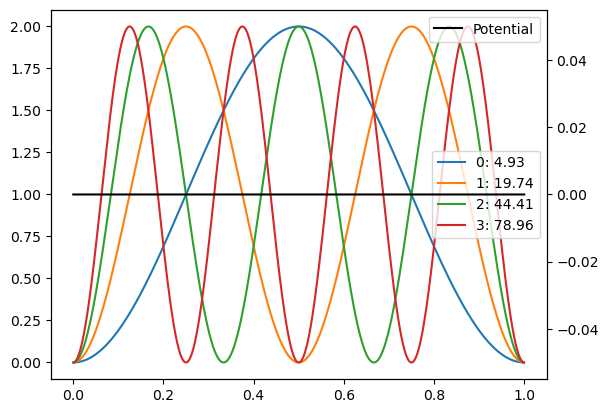

In [12]:
numStates=4
fig,ax = plt.subplots(1,1)
axTwin=ax.twinx()

ax.plot(x[1:-1],eigenvectors[:,:numStates]**2,"-",label=[f"{i}: {val:>0.2f}" for i,val in enumerate(eigenvalues[:numStates])])
axTwin.plot(x,V_x,"k-",label="Potential")
axTwin.legend()
ax.legend()


In [13]:
def E_n(n, m = m, L = L):
    return n*n*np.pi*np.pi/(2*m*L*L)

(E_n(1)*m*L*L, E_n(2)*m*L*L, E_n(3)*m*L*L, E_n(4)*m*L*L)

(4.93480220054468, 19.73920880217872, 44.41321980490212, 78.95683520871488)